In [5]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock Data.csv')

# Display the first few rows of the dataset
df.head()


,date,open,high,low,close,adj_close,volume
0,2015-06-30,19.000000,19.000000,19.00,19.000000,19.000000,0
1,2015-07-01,29.900000,31.900000,27.82,28.500000,28.500000,10512900
2,2015-07-02,28.090000,29.250000,26.16,28.000000,28.000000,1199200
3,2015-07-06,26.110001,27.809999,26.01,26.690001,26.690001,512800
4,2015-07-07,26.930000,27.850000,25.66,27.010000,27.010000,700700


In [6]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1218 non-null   object 
 1   open       1218 non-null   float64
 2   high       1218 non-null   float64
 3   low        1218 non-null   float64
 4   close      1218 non-null   float64
 5   adj_close  1218 non-null   float64
 6   volume     1218 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 66.7+ KB


In [7]:
# Display summary statistics of the dataset
df.describe()


,open,high,low,close,adj_close,volume
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,45.079374,46.287660,43.909576,45.155148,45.155148,1.100944e+06
std,31.683406,32.850301,30.565825,31.816672,31.816672,1.082333e+06
min,9.500000,9.780000,9.080000,9.500000,9.500000,0.000000e+00
25%,18.992500,19.422500,18.577999,19.000000,19.000000,4.421000e+05
50%,34.700001,35.410000,34.024999,34.700001,34.700001,8.408500e+05
75%,62.917499,64.404751,61.494999,62.982500,62.982500,1.353650e+06
max,196.029999,203.850006,193.649994,194.889999,194.889999,1.337710e+07


**How are the features related to the target variable (stock price movements)?**

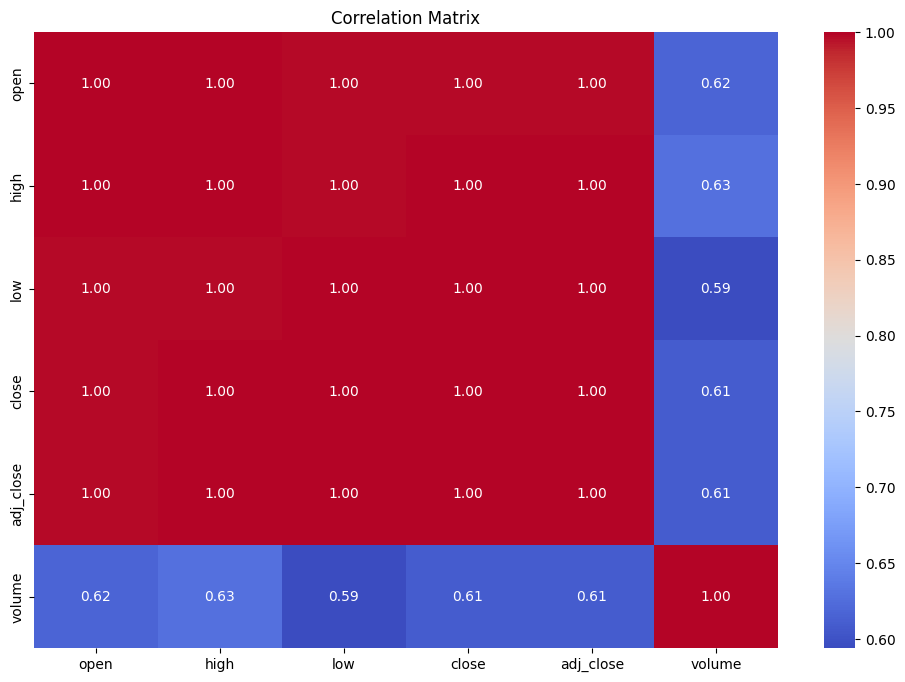

In [8]:
# Visualize the correlation matrix
corr_matrix = df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


** do we preprocess the data for the Passive Aggressive Regression model?**

In [9]:
# Extract features and target variable
X = df[['open', 'high', 'low', 'close', 'adj_close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**How do we train the Passive Aggressive Regression model?**

In [10]:
# Create and train the Passive Aggressive Regression model
model = PassiveAggressiveRegressor(max_iter=100, random_state=42)
model.fit(X_train_scaled, y_train)


PassiveAggressiveRegressor(max_iter=100, random_state=42)

**How well does the model perform, and what is the mean squared error?**

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.007603513542310245


**Can we visualize the predicted vs actual stock price movements?**

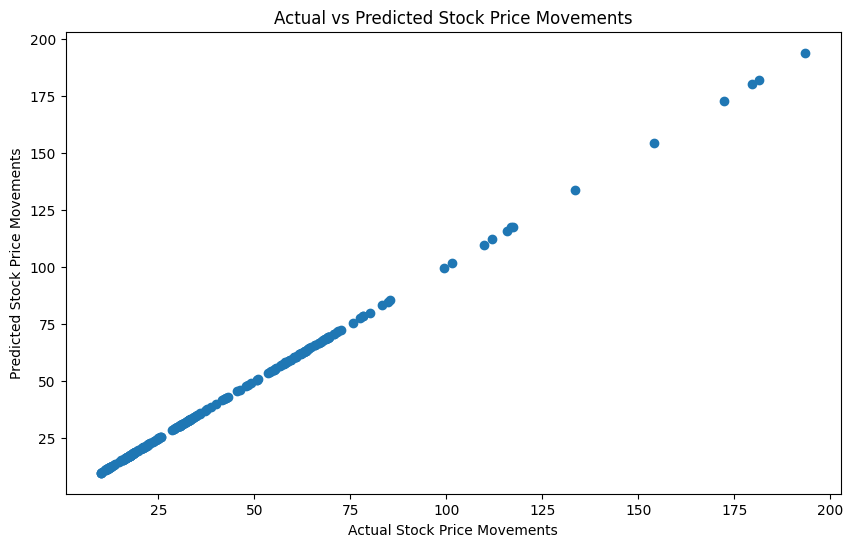

In [12]:
# Visualize predicted vs actual stock price movements
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stock Price Movements")
plt.ylabel("Predicted Stock Price Movements")
plt.title("Actual vs Predicted Stock Price Movements")
plt.show()


**Can we visualize the model coefficients to understand feature importance?**

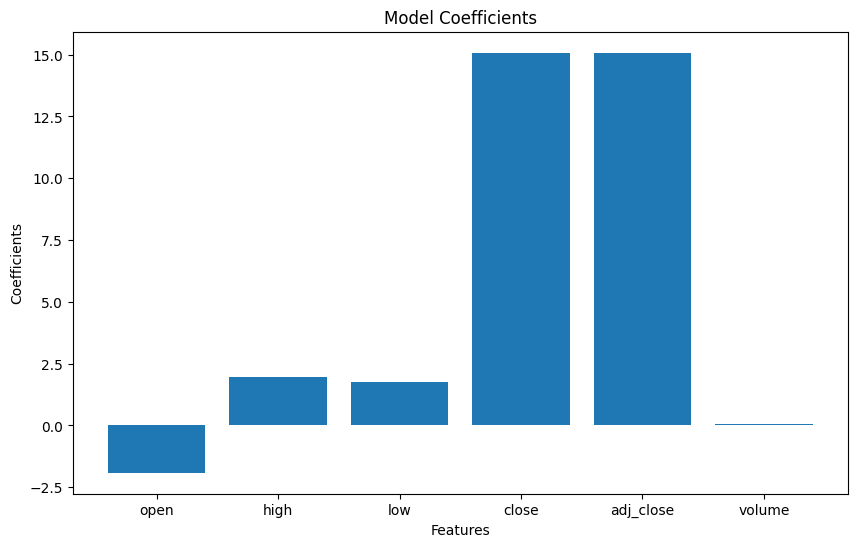

In [13]:
# Visualize model coefficients
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Model Coefficients")
plt.show()


**How can we interpret the model coefficients in the context of stock price movements?**

In [14]:
# Interpretation of model coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print("Interpretation of Model Coefficients:")
print(coefficients_df)


Interpretation of Model Coefficients:
     Feature  Coefficient
3      close    15.080809
4  adj_close    15.080809
1       high     1.946876
2        low     1.739547
5     volume     0.032754
0       open    -1.913291


**How sensitive is the model to changes in hyperparameters, such as max_iter?**

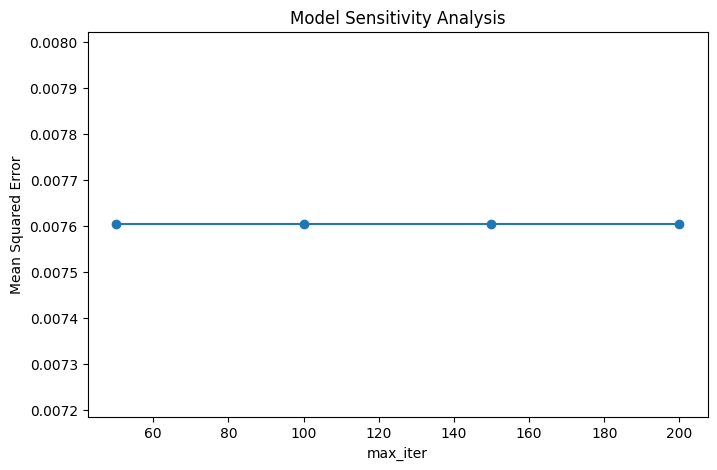

In [15]:
# Evaluate model sensitivity to changes in max_iter
max_iter_values = [50, 100, 150, 200]
mse_values = []

for max_iter_value in max_iter_values:
    model = PassiveAggressiveRegressor(max_iter=max_iter_value, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Visualize sensitivity analysis
plt.figure(figsize=(8, 5))
plt.plot(max_iter_values, mse_values, marker='o')
plt.xlabel("max_iter")
plt.ylabel("Mean Squared Error")
plt.title("Model Sensitivity Analysis")
plt.show()


**How can we fine-tune the model for better performance?**

In [16]:
# Fine-tune the model using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter': [50, 100, 150, 200]}
grid_search = GridSearchCV(PassiveAggressiveRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter
best_max_iter = grid_search.best_params_['max_iter']

# Train the model with the best hyperparameter
model = PassiveAggressiveRegressor(max_iter=best_max_iter, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model performance
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Fine-tuned Model Mean Squared Error: {mse}")


Fine-tuned Model Mean Squared Error: 0.007603513542310245


**How can we visualize the actual vs predicted stock prices over time?**

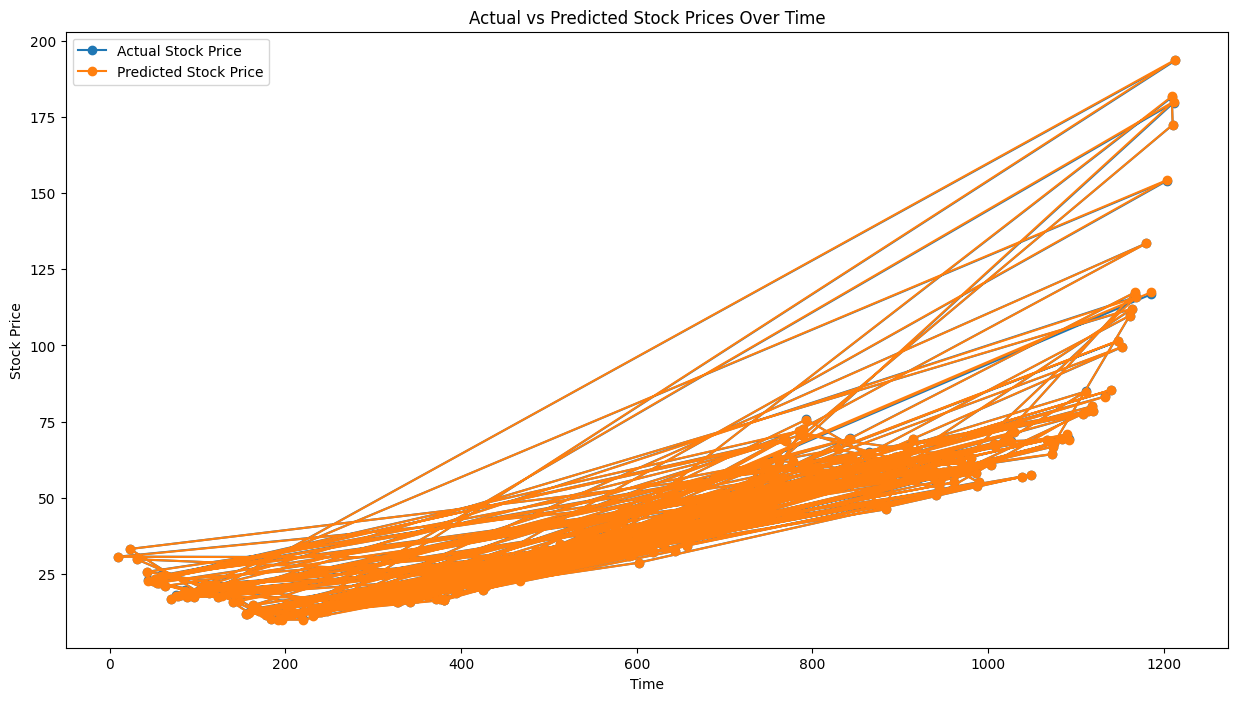

In [17]:
# Add a new column for the predicted values in the test set
df_test = pd.DataFrame(X_test, columns=['open', 'high', 'low', 'close', 'adj_close', 'volume'])
df_test['actual'] = y_test
df_test['predicted'] = y_pred

# Visualize actual vs predicted stock prices over time
plt.figure(figsize=(15, 8))
plt.plot(df_test['actual'], label='Actual Stock Price', marker='o')
plt.plot(df_test['predicted'], label='Predicted Stock Price', marker='o')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices Over Time")
plt.legend()
plt.show()


**Can we analyze the residuals to understand model performance better?**

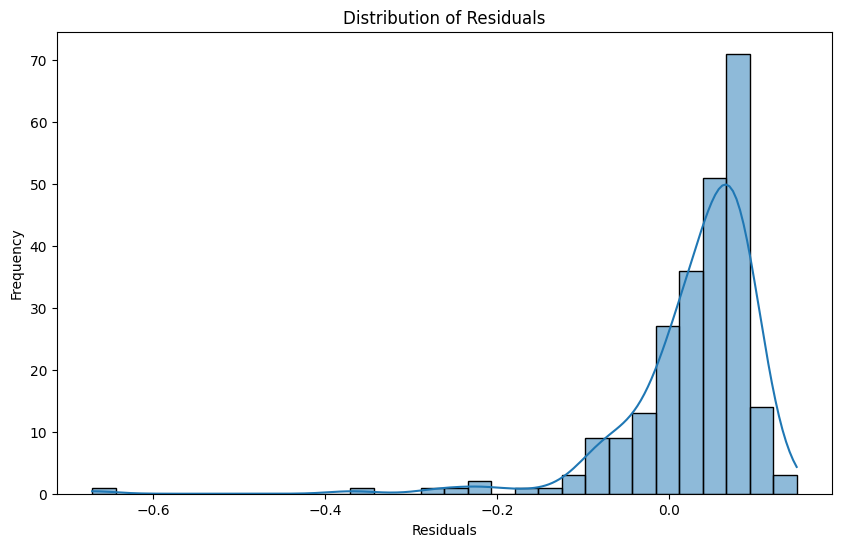

In [18]:
# Calculate residuals (the difference between actual and predicted values)
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


**What is the R-squared value of the model?**

In [20]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared Value: {r2}")


R-squared Value: 0.9999922319557274


**How can we perform cross-validation to evaluate the model's performance more robustly?**

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(PassiveAggressiveRegressor(max_iter=best_max_iter, random_state=42),
                            X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation scores
cv_rmse_scores = pd.Series(-cv_scores, name="RMSE")
print("Cross-Validation RMSE Scores:")
print(cv_rmse_scores)
print(f"Mean RMSE: {cv_rmse_scores.mean()}")


Cross-Validation RMSE Scores:
0    0.006507
1    0.009455
2    0.006942
3    0.017740
4    0.006831
Name: RMSE, dtype: float64
Mean RMSE: 0.009494871143402741


**How can we visualize the cross-validation scores?**

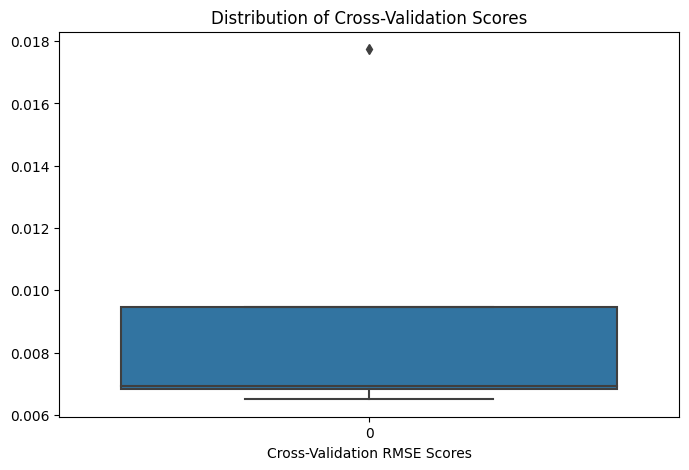

In [22]:
# Visualize cross-validation scores
plt.figure(figsize=(8, 5))
sns.boxplot(cv_rmse_scores)
plt.xlabel("Cross-Validation RMSE Scores")
plt.title("Distribution of Cross-Validation Scores")
plt.show()


**Visualize the distribution of the target variable 'close' (closing price)**

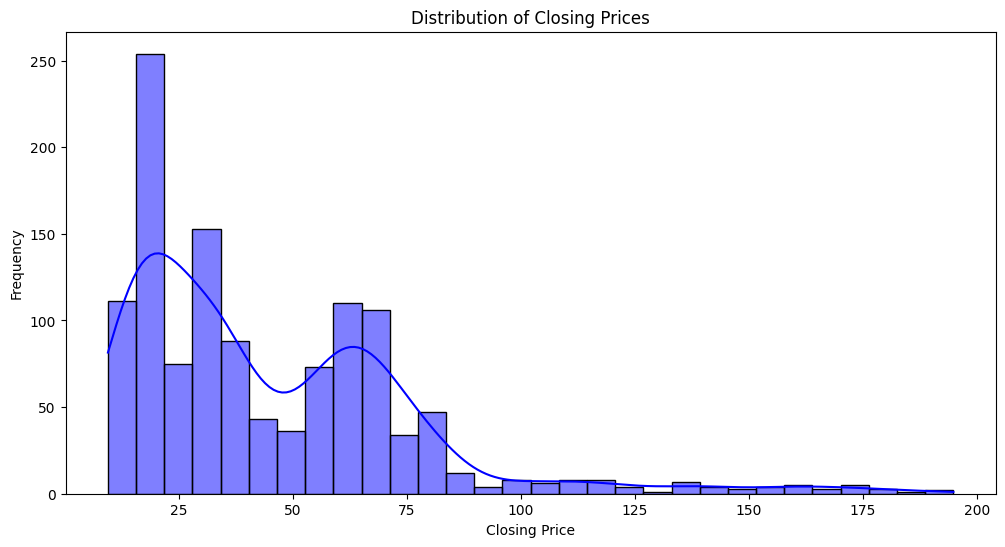

In [25]:
# Visualize the distribution of the target variable 'close' (closing price)
plt.figure(figsize=(12, 6))
sns.histplot(df['close'], bins=30, kde=True, color='blue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

**How are the features correlated with the closing price?**

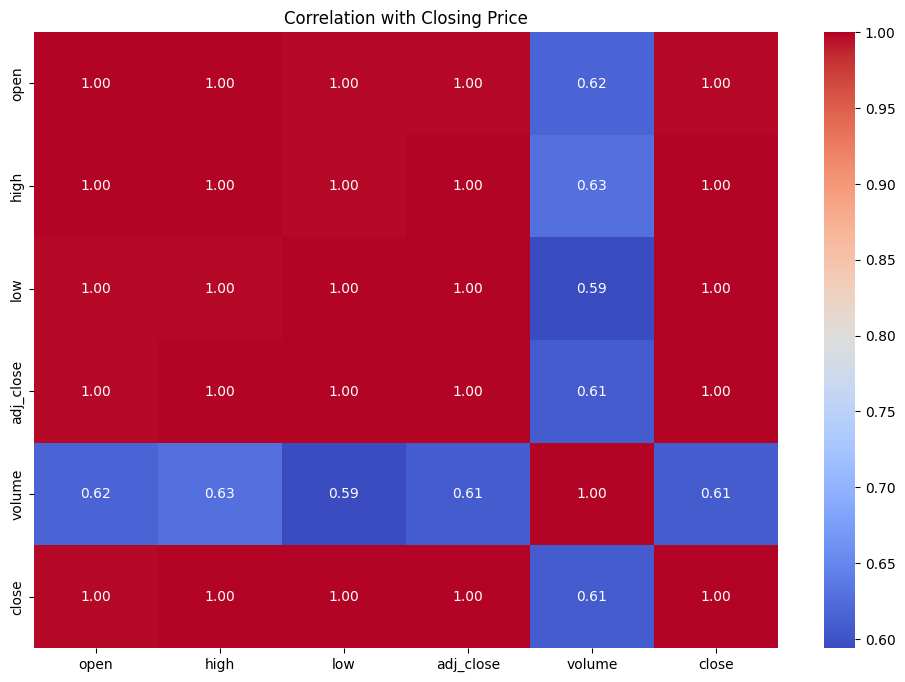

In [26]:
# Visualize the correlation between features and the target variable 'close'
plt.figure(figsize=(12, 8))
corr_with_close = df[['open', 'high', 'low', 'adj_close', 'volume', 'close']].corr()
sns.heatmap(corr_with_close, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Closing Price")
plt.show()


**Can we explore the trend of closing prices over time?**

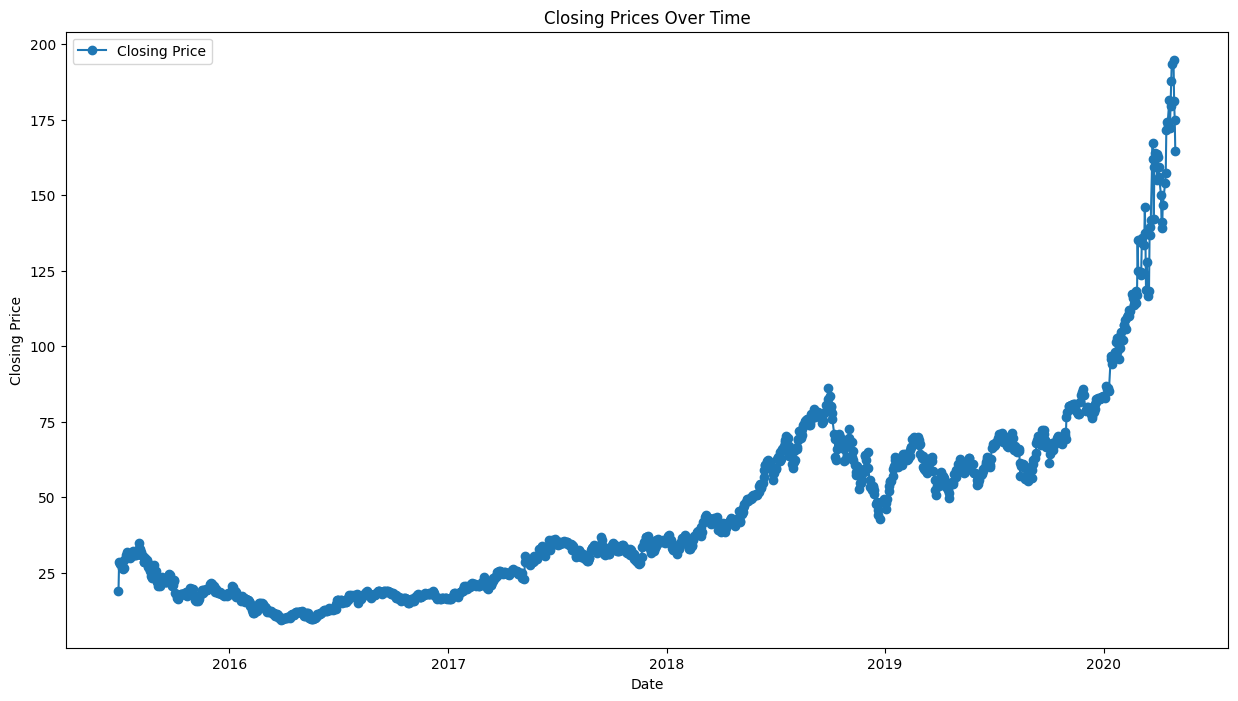

In [27]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Visualize the trend of closing prices over time
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['close'], label='Closing Price', marker='o')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


**How does trading volume vary over time?**

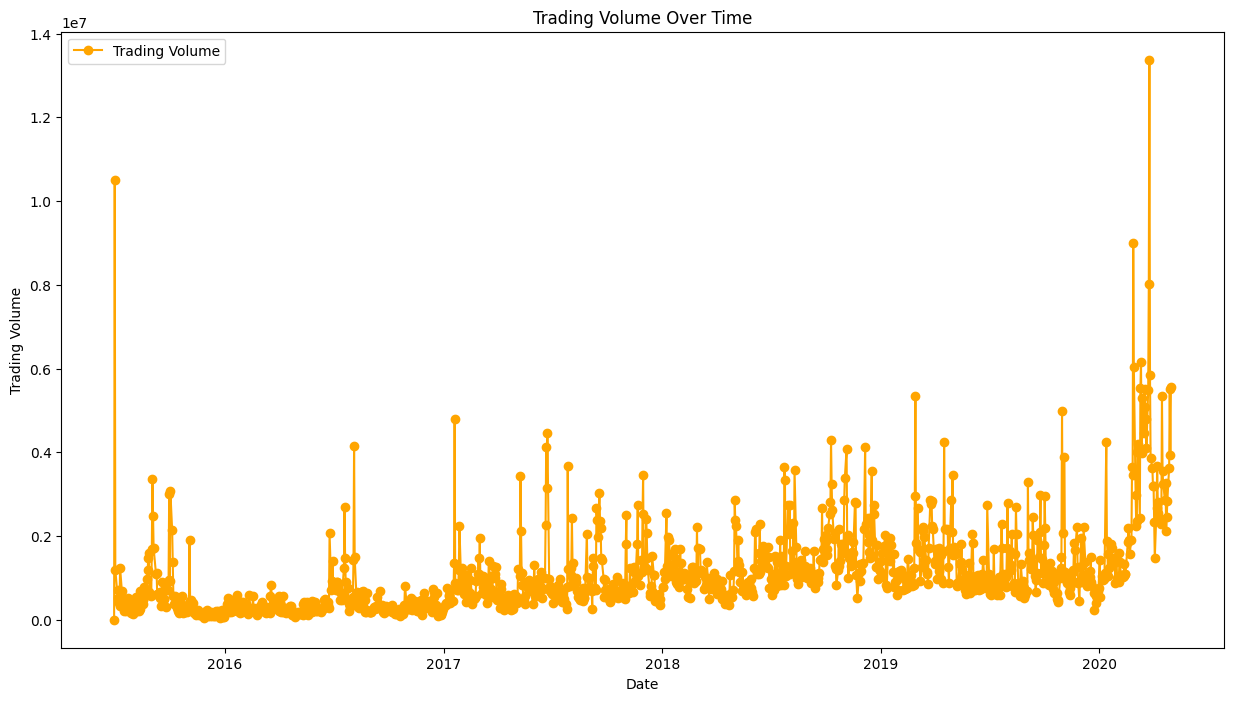

In [28]:
# Visualize trading volume over time
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['volume'], label='Trading Volume', marker='o', color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.legend()
plt.show()


**Are there any notable trends or patterns in the stock data?**

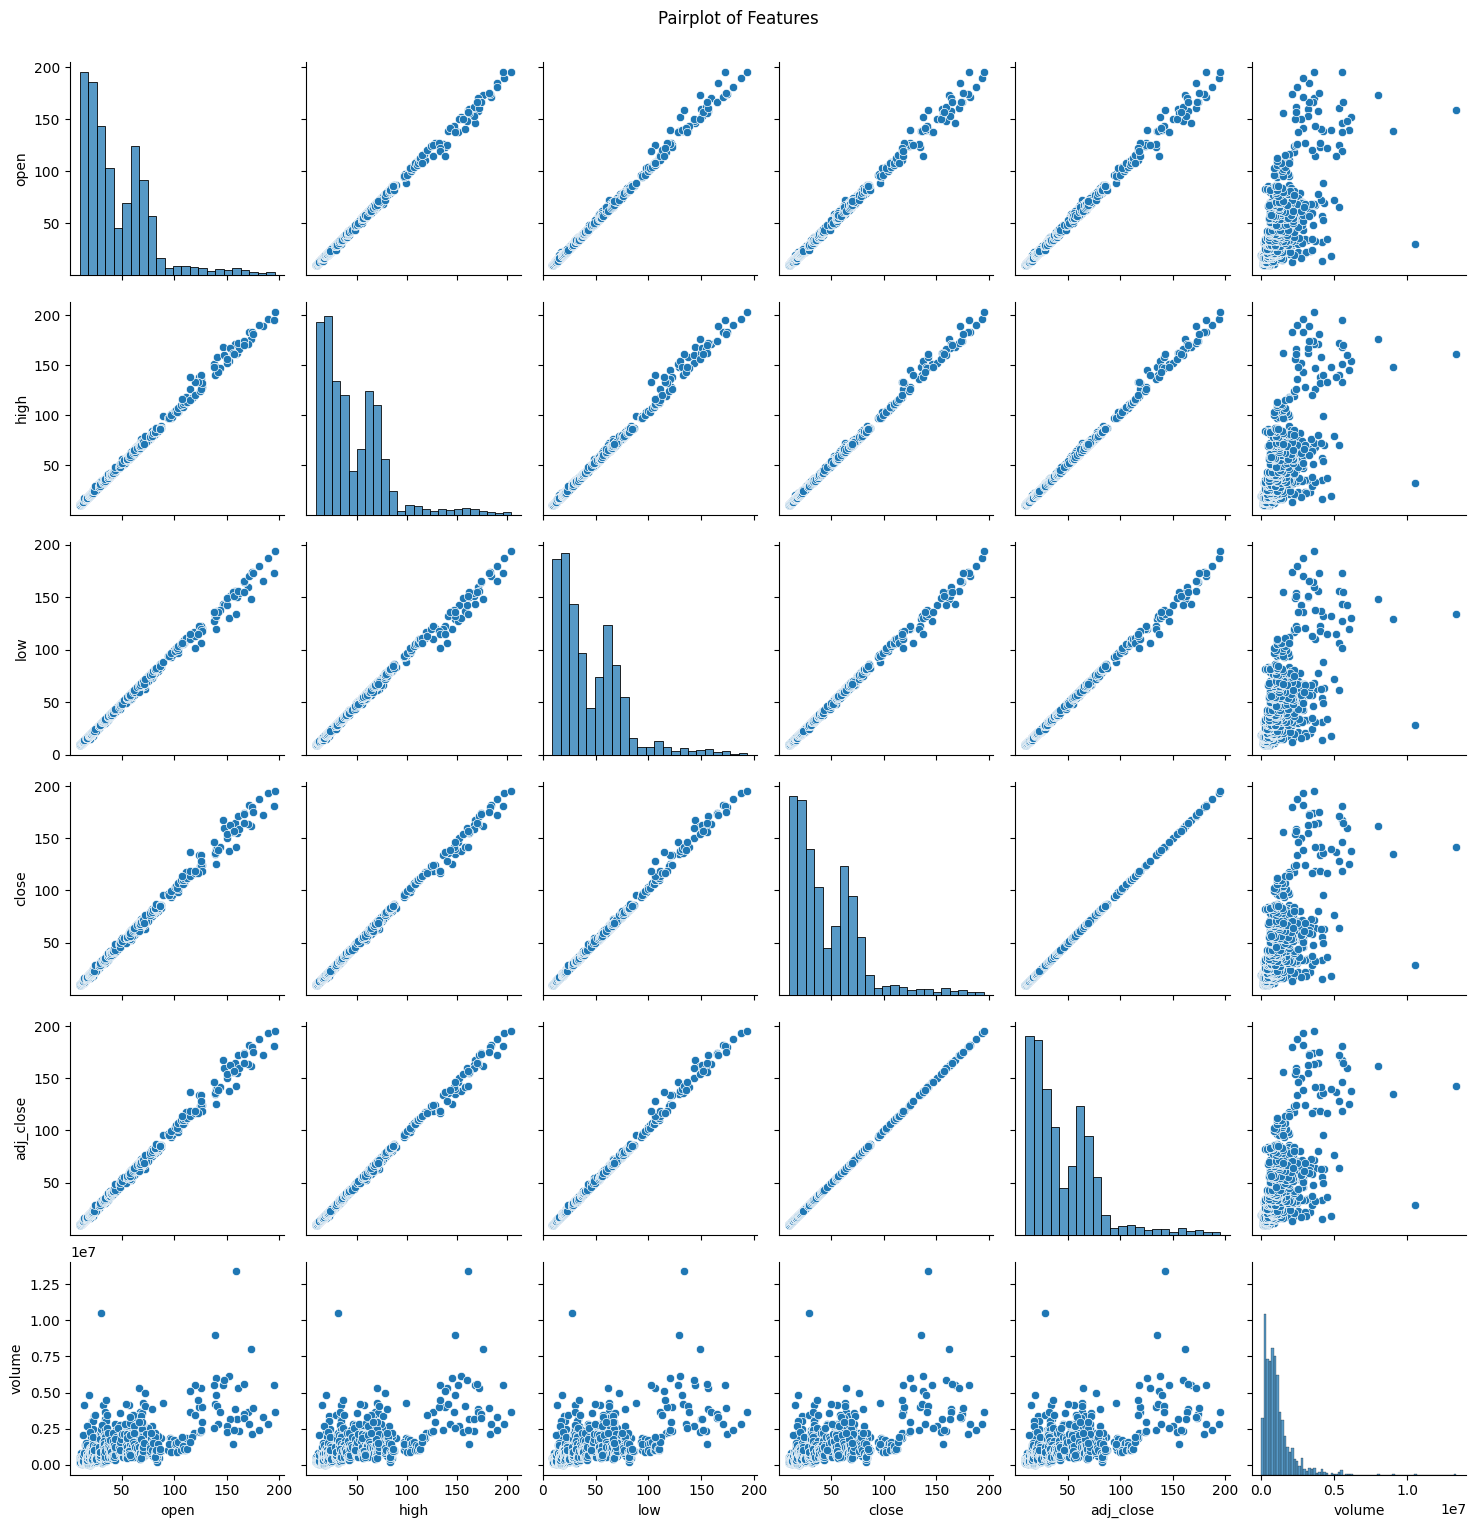

In [29]:
# Pairplot for visualizing relationships between features
sns.pairplot(df[['open', 'high', 'low', 'close', 'adj_close', 'volume']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


**What are the distributions of other key features in the dataset?**

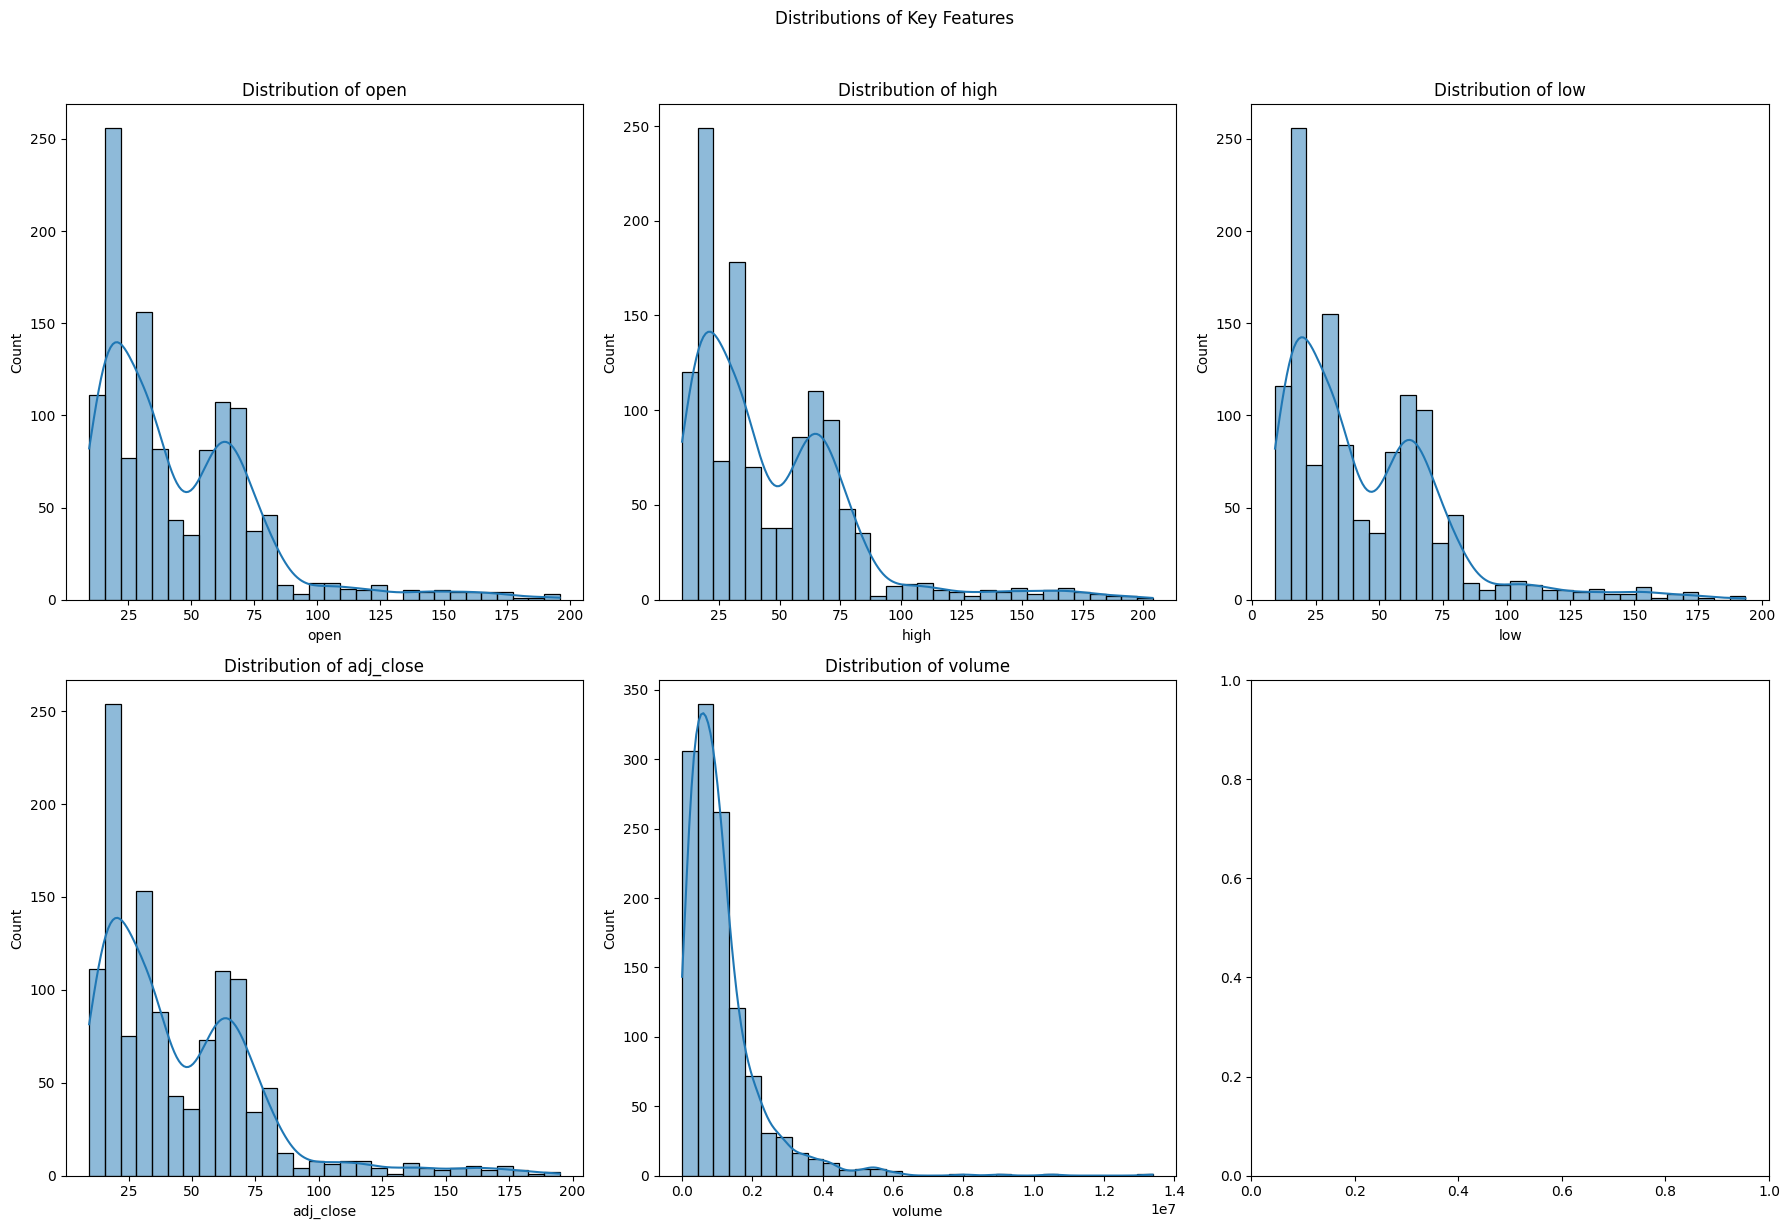

In [30]:
# Visualize distributions of other key features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Distributions of Key Features", y=1.02)

features = ['open', 'high', 'low', 'adj_close', 'volume']

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


***How does the closing price vary based on different time intervals (e.g., monthly)?***

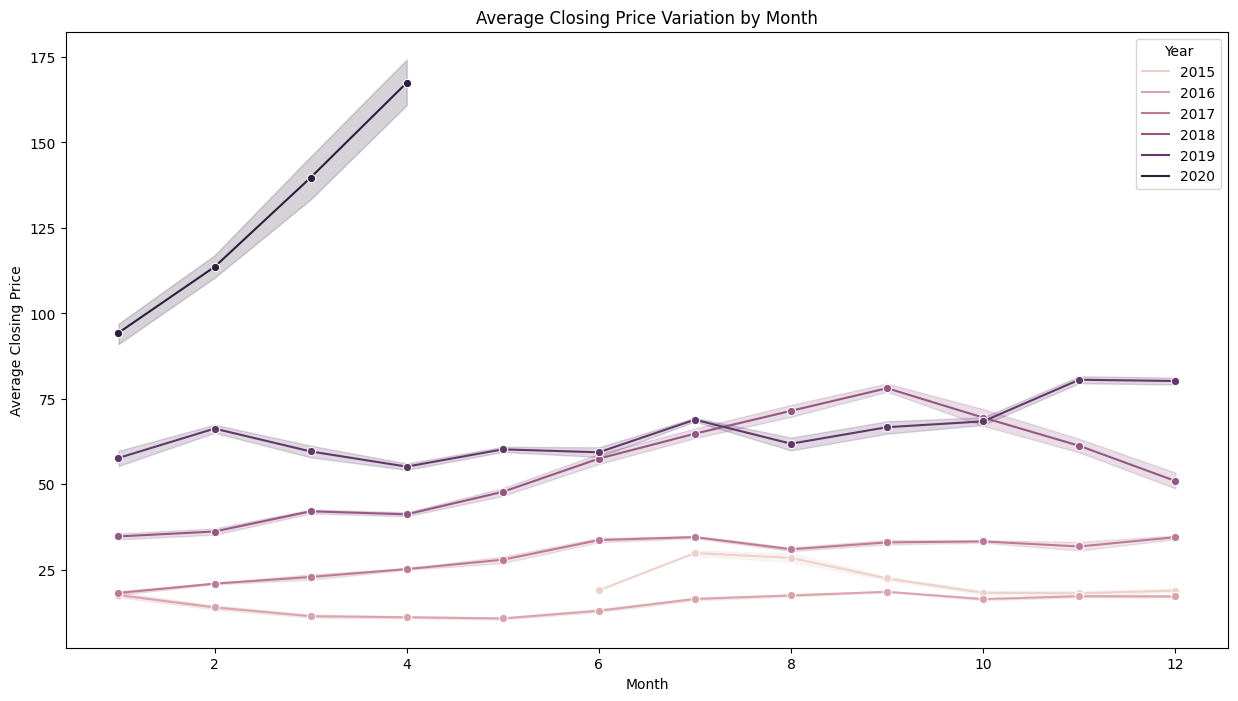

In [31]:
# Extract month and year from the date for analysis
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Visualize the average closing price per month
plt.figure(figsize=(15, 8))
sns.lineplot(x='month', y='close', hue='year', data=df, marker='o')
plt.title("Average Closing Price Variation by Month")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.legend(title="Year")
plt.show()


**Can we explore relationships between features in more detail?**

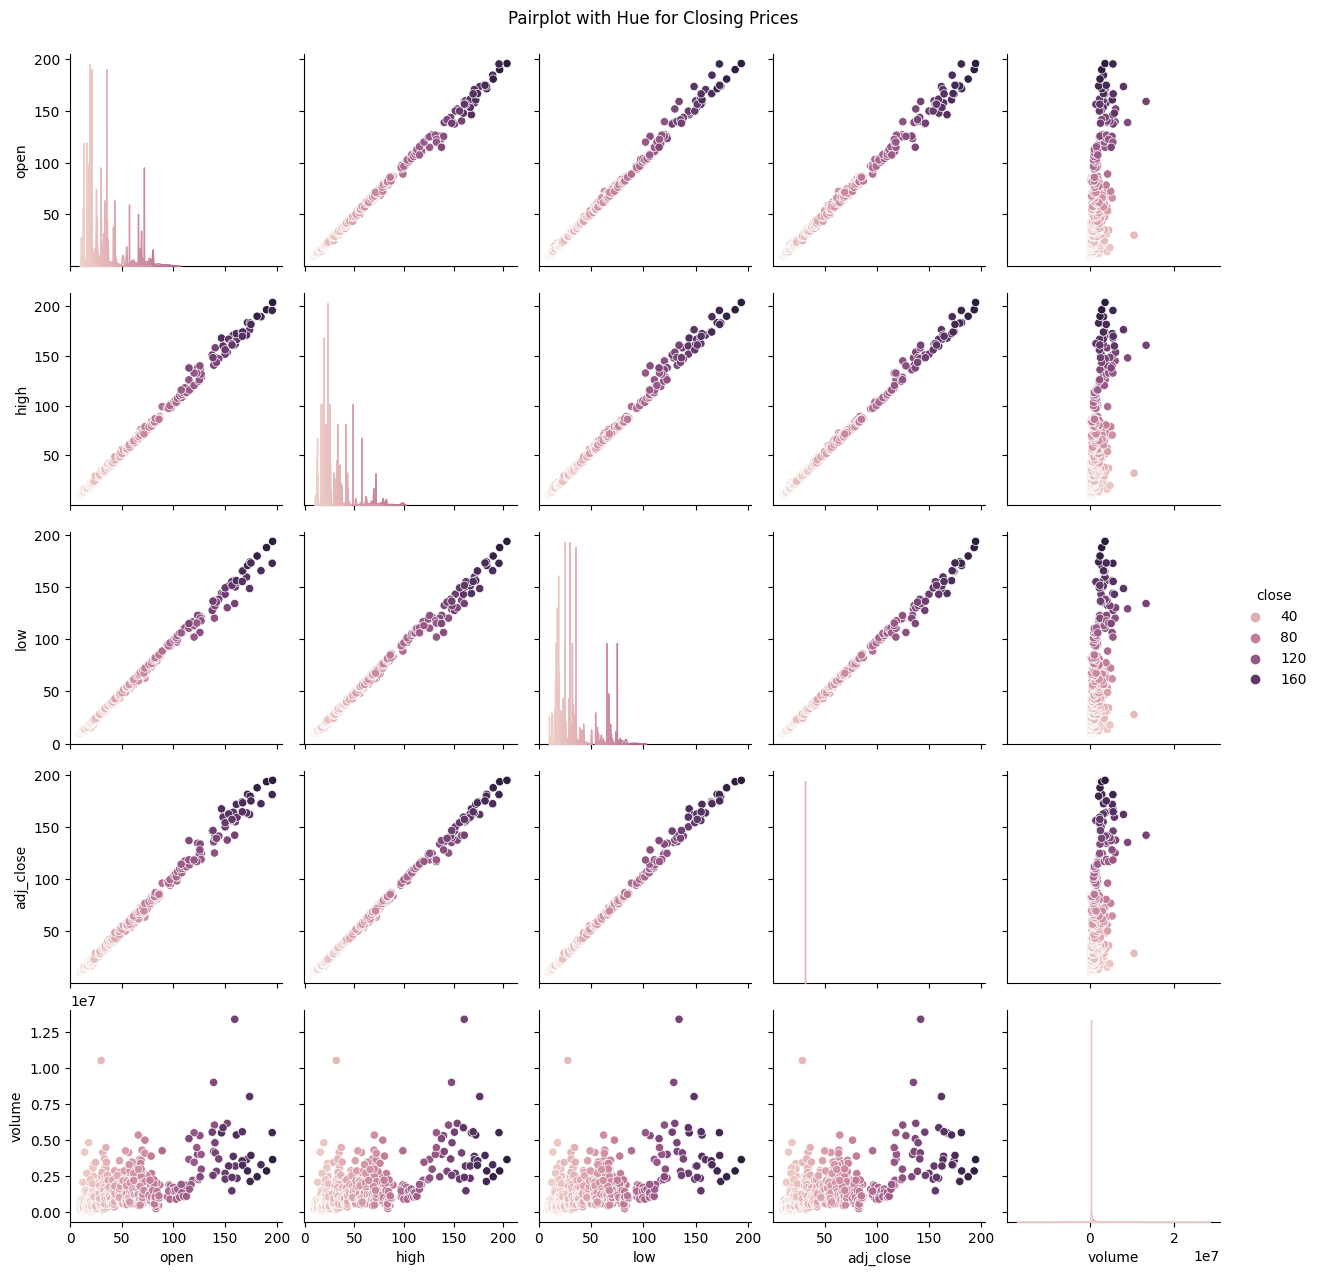

In [33]:
# Pairplot with hue for visualizing relationships with the target variable 'close'
sns.pairplot(df[['open', 'high', 'low', 'adj_close', 'volume', 'close']], hue='close')
plt.suptitle("Pairplot with Hue for Closing Prices", y=1.02)
plt.show()
